## Evaluation of the Stresser Model

In [20]:
import pandas as pd
import json
import numpy as np
import altair as alt
alt.renderers.enable('default')
#alt.renderers.enable('notebook')
%matplotlib inline

#### Distribution of words in full data set

In [21]:
full = json.load(open("./data/stresses_1.json", "r"))
print(len(full))

48219


One-syll words in full dataset: 4027
Two-syll words in full dataset: 16140
Three-syll words in full dataset: 17825
Four-syll words in full dataset: 8270
Five-syll words in full dataset: 1721
Six-syll words in full dataset: 229
Seven-syll words in full dataset: 7


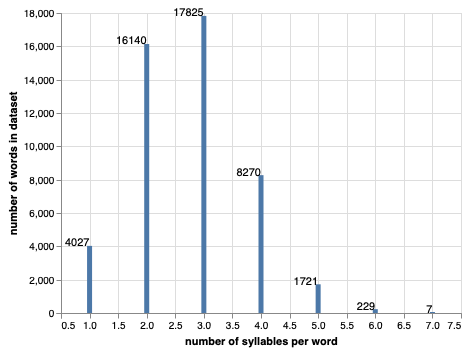

In [22]:
syllabified_words = []
number_of_sylls = []

for d in full.values():
    syllabified_words.append(d['syllabified'])

for item in syllabified_words:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    number_of_sylls.append(cnt)


print('One-syll words in full dataset:', number_of_sylls.count(1))
print('Two-syll words in full dataset:', number_of_sylls.count(2))
print('Three-syll words in full dataset:', number_of_sylls.count(3))
print('Four-syll words in full dataset:', number_of_sylls.count(4))
print('Five-syll words in full dataset:', number_of_sylls.count(5))
print('Six-syll words in full dataset:', number_of_sylls.count(6))
print('Seven-syll words in full dataset:', number_of_sylls.count(7))



source = pd.DataFrame({
    'number of syllables per word': [7, 6, 5, 4, 3, 2, 1],
    'number of words in dataset': [number_of_sylls.count(7), number_of_sylls.count(6), number_of_sylls.count(5),
          number_of_sylls.count(4), number_of_sylls.count(3), number_of_sylls.count(2), number_of_sylls.count(1)]
})

chart = alt.Chart(source).mark_bar().encode(
    x='number of syllables per word',
    y='number of words in dataset')

text = chart.mark_text(
    align='right'
).encode(
    text='number of words in dataset'
)

chart + text

#### Loading gold and silver datasets for evaluation

In [7]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold = [value["syllabified"] for value in gold]
items_silver = [value["syllabified"] for value in silver]

#### Convert to dataframes

In [8]:
df_gold = pd.DataFrame(value["syllabified"] for value in gold)
df_gold = df_gold.rename(index=str, columns={0: "gold_syllabification"})
#print(df_gold.head())
print('Total number of words in gold:', len(df_gold))

df_silver = pd.DataFrame(value["syllabified"] for value in silver)
df_silver = df_silver.rename(index=str, columns={0: "silver_syllabification"})
#print(df_silver.head())
print('Total number of words in silver:', len(df_silver))

Total number of words in gold: 4822
Total number of words in silver: 4822


#### General comparison between gold and silver dataframes

In [9]:
diff_keys = set(items_silver) ^ set(items_gold)
print('Mistakes are made against the syllabification these words:', diff_keys)

Mistakes are made against the syllabification these words: {'mon-tes-claer', 'va-len-ci-a-ne', 'a-chil-leus-se', 'lie-art', 'pas-cha-lijs', 'cas-taeng-ier', 'mel-iaen', 'sa-mu-el', 'verz-maet', 'ghee-rent', 'pro-miss-ioen', 'an-sker-ken', 'to-ver-ye', 'on-te-de', 'on-trin-nen', 'aer-driic', 'on-tru-men', 'vi-taelg-ien', 'doer-sni-den', 'pro-mis-sioen', 'car-bu-a', 'on-treect', 'hoe-sche-li-ke', 'mon-te-sclaer', 'sa-muel', 'ver-zmaet', 'car-bua', 'ont-e-de', 'te-sco-ren', 'jo-a-chas', 'grim-me-stoen', 'pos-thu-mus', 'a-chil-le-us-se', 'vers-maetst', 'tbes-tant', 'his-paen', 'e-xem-pla-re', 'bi-spel', 'u-ter-sten', 'lan-trech-te', 'ba-liu', 'faiu-wee-le', 'lieart', 'an-drien', 'gran-tuer', 'voglen', 'an-nun-ci-a-cie', 'lant-rech-te', 'vlees-chel-kijn', 'pom-pe-ia', 'men-si-oen', 'is-ma-ë-li-te', 'vi-tael-gien', 'bulg-ioen', 'me-li-aen', 'o-vers-ma-ken', 'ge-pli-en', 'ont-rin-nen', 'spaengh-ien', 'doers-ni-den', 'cas-taen-gier', 'to-sca-nen', 'hoes-che-li-ke', 'ont-riet', 'do-mi-na-ti-o-n

In [10]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

value_counts = (result.gold_syllabification == result.silver_syllabification).value_counts()
print(value_counts)

True     4717
False     105
dtype: int64


#### Print dataframe with mistakes

In [11]:
result = pd.concat([df_gold, df_silver], axis=1)
result['correct?'] = (result['silver_syllabification'] == result['gold_syllabification'])

true_false = result.set_index('correct?')
mistakes = true_false.loc[False]
mistakes

,gold_syllabification,silver_syllabification
correct?,,
False,se-ra-pi-oe-ne,se-rap-ioe-ne
False,an-ac-ho-ri-te,a-na-cho-ri-te
False,am-bass-ia-to-re,am-bas-sia-to-re
False,mon-tes-claer,mon-te-sclaer
False,jul-ie-nen,ju-lie-nen
False,be-di-en,be-dien
False,da-ne-sien,da-ne-si-en
False,is-ma-ë-li-te,is-maë-li-te
False,huesc-he-de,hue-sche-de


#### Expand dataframe with information about syllable counts

In [12]:
num_sylls_gold = []
num_sylls_silver = []


for item in items_gold:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_gold.append(cnt)


for item in items_silver:
    cnt = 0
    num_syl_word = item.split("-")
    cnt += (len(num_syl_word))
    num_sylls_silver.append(cnt)
    
# Make df's

df_gold_syll_count = pd.DataFrame(num_sylls_gold)
df_gold_syll_count = df_gold_syll_count.rename(index=str, columns={0: "num_sylls_gold"})

df_silver_syll_count = pd.DataFrame(num_sylls_silver)
df_silver_syll_count = df_silver_syll_count.rename(index=str, columns={0: "num_sylls_silver"})

result_sylls = pd.concat([df_gold_syll_count, df_gold, df_silver_syll_count, df_silver], axis=1)

result_sylls['correct?'] = (df_gold_syll_count['num_sylls_gold'] == df_silver_syll_count['num_sylls_silver'])

x = result_sylls.set_index('correct?')
mistakes_number_of_sylls = x.loc[False]
mistakes_number_of_sylls
#print(mistakes_number_of_sylls)
print('Incorrect predictions about the number of syllables in a word:', len(mistakes_number_of_sylls), '(out of a total of', len(items_gold), 'words).')

Incorrect predictions about the number of syllables in a word: 39 (out of a total of 4822 words).


#### Calculate accuracy for mono- and polysyllable words

In [13]:
cnt_1syllable_words = 0
cnt_2syllable_words = 0
cnt_3syllable_words = 0
cnt_4syllable_words = 0
cnt_5syllable_words = 0
cnt_6syllable_words = 0
cnt_7syllable_words = 0


for item in items_gold:
    num_syl_word = item.split("-")
    if len(num_syl_word) == 1:
        cnt_1syllable_words += 1
    elif len(num_syl_word) == 2:
        cnt_2syllable_words += 1
    elif len(num_syl_word) == 3:
        cnt_3syllable_words += 1
    elif len(num_syl_word) == 4:
        cnt_4syllable_words += 1
    elif len(num_syl_word) == 5:
        cnt_5syllable_words += 1
    elif len(num_syl_word) == 6:
        cnt_6syllable_words += 1
    elif len(num_syl_word) == 7:
        cnt_7syllable_words += 1
        

cnt_1syllable_words_mistakes = 0
cnt_2syllable_words_mistakes = 0
cnt_3syllable_words_mistakes = 0
cnt_4syllable_words_mistakes = 0
cnt_5syllable_words_mistakes = 0
cnt_6syllable_words_mistakes = 0
cnt_7syllable_words_mistakes = 0


if len(num_sylls_gold) == len(num_sylls_silver):
    for i in range(len(num_sylls_gold)):
        if num_sylls_gold[i] == 1 and num_sylls_silver[i] != 1:
            cnt_1syllable_words_mistakes += 1
        if num_sylls_gold[i] == 2 and num_sylls_silver[i] != 2:
            cnt_2syllable_words_mistakes += 1
        if num_sylls_gold[i] == 3 and num_sylls_silver[i] != 3:
            cnt_3syllable_words_mistakes += 1
        if num_sylls_gold[i] == 4 and num_sylls_silver[i] != 4:
            cnt_4syllable_words_mistakes += 1
        if num_sylls_gold[i] == 5 and num_sylls_silver[i] != 5:
            cnt_5syllable_words_mistakes += 1
        if num_sylls_gold[i] == 6 and num_sylls_silver[i] != 6:
            cnt_6syllable_words_mistakes += 1
        if num_sylls_gold[i] == 7 and num_sylls_silver[i] != 7:
            cnt_7syllable_words_mistakes += 1

print('Total number of 1syllabic words:', cnt_1syllable_words, 'Mistakes:', cnt_1syllable_words_mistakes)
print('Total number of 2syllabic words:', cnt_2syllable_words, 'Mistakes:', cnt_2syllable_words_mistakes)
print('Total number of 3syllabic words:', cnt_3syllable_words, 'Mistakes:', cnt_3syllable_words_mistakes)
print('Total number of 4syllabic words:', cnt_4syllable_words, 'Mistakes:', cnt_4syllable_words_mistakes)
print('Total number of 5syllabic words:', cnt_5syllable_words, 'Mistakes:', cnt_5syllable_words_mistakes)
print('Total number of 6syllabic words:', cnt_6syllable_words, 'Mistakes:', cnt_6syllable_words_mistakes)
print('Total number of 7syllabic words:', cnt_7syllable_words, 'Mistakes:', cnt_7syllable_words_mistakes)    

try:
            
    print('Accuracy syllabification of one-syllable words:', float(100-cnt_1syllable_words_mistakes/cnt_1syllable_words))
    print('Accuracy syllabification of two-syllable words:', float(100-cnt_2syllable_words_mistakes/cnt_2syllable_words))
    print('Accuracy syllabification of three-syllable words:', float(100-cnt_3syllable_words_mistakes/cnt_3syllable_words))
    print('Accuracy syllabification of four-syllable words:', float(100-cnt_4syllable_words_mistakes/cnt_4syllable_words))
    print('Accuracy syllabification of five-syllable words:', float(100-cnt_5syllable_words_mistakes/cnt_5syllable_words))
    print('Accuracy syllabification of six-syllable words:', float(100-cnt_6syllable_words_mistakes/cnt_6syllable_words))
    print('Accuracy syllabification of seven-syllable words:', float(100-cnt_7syllable_words_mistakes/cnt_7syllable_words))

except ZeroDivisionError:
    print("You can't divide by zero!")

Total number of 1syllabic words: 397 Mistakes: 2
Total number of 2syllabic words: 1677 Mistakes: 5
Total number of 3syllabic words: 1755 Mistakes: 19
Total number of 4syllabic words: 798 Mistakes: 7
Total number of 5syllabic words: 172 Mistakes: 6
Total number of 6syllabic words: 23 Mistakes: 0
Total number of 7syllabic words: 0 Mistakes: 0
Accuracy syllabification of one-syllable words: 99.99496221662469
Accuracy syllabification of two-syllable words: 99.99701848539058
Accuracy syllabification of three-syllable words: 99.98917378917379
Accuracy syllabification of four-syllable words: 99.99122807017544
Accuracy syllabification of five-syllable words: 99.96511627906976
Accuracy syllabification of six-syllable words: 100.0
You can't divide by zero!


#### Analysis of stress pattern predictions

In [14]:
gold = json.load(open("./data/splits/test.json", "r"))
silver = json.load(open("model_s/silver_test.json", "r"))

items_gold_human_annotation = [value["human_annotation"] for value in gold]
items_gold_corrected_stress = [value["corrected_stress"] for value in gold]
items_gold_patterns = [value["stress_idx"] for value in gold]

items_silver_predictions = [value["human_annotation"] for value in silver]

print(len(items_gold_human_annotation))
print(len(items_gold_corrected_stress))
print(len(items_gold_patterns))
print(len(items_silver_predictions))


gold_predictions = []
silver_predictions = []

for item1, item2, item3 in zip(items_gold_human_annotation, items_gold_corrected_stress, items_gold_patterns):
    if item1 is not None:
        gold_predictions.append(item1)
    elif item2 is not None:
        gold_predictions.append(item2)
    else:
        gold_predictions.append(item3) 

for item in items_silver_predictions:
    if len(item) == 1:
        silver_predictions.append(item)
    else:
        silver_predictions.append([item])


print('Total number of gold stress patterns:', len(gold_predictions))
print('Total number of silver stress patterns:', len(silver_predictions))

# Make df's

df_gold_stress = pd.DataFrame(gold_predictions)
df_gold_stress = df_gold_stress.rename(index=str, columns={0: "gold_stress"})

df_silver_stress = pd.DataFrame(silver_predictions)
df_silver_stress = df_silver_stress.rename(index=str, columns={0: "silver_stress"})

result_stress = pd.concat([df_gold_stress, df_gold, df_silver_stress, df_silver], axis=1)

result_stress['correct?'] = (df_gold_stress['gold_stress'] == df_silver_stress['silver_stress'])

x = result_stress.set_index('correct?')
x
mistakes_stress = x.loc[False]
mistakes_stress
#mistakes_stress.to_csv(r'mistakes4.csv')

4822
4822
4822
4822
Total number of gold stress patterns: 4822
Total number of silver stress patterns: 4822


,gold_stress,gold_syllabification,silver_stress,silver_syllabification
correct?,,,,
False,-2,ed-war-de,-3,ed-war-de
False,"[-4, -2]",ba-ro-ni-en,-4,ba-ro-ni-en
False,-2,y-sa-yas,"[-3, -1]",y-sa-yas
False,-2,mael-tijt,-1,mael-tijt
False,-2,op-hout,-1,op-hout
False,"[-5, -2]",am-bass-ia-to-re,"[-4, -2]",am-bas-sia-to-re
False,-3,trae-no-ge,-2,trae-no-ge
False,-1,vrye-rie,-2,vrye-rie
False,"[-3, -1]",tho-lo-bo-as,"[-3, -2]",tho-lo-bo-as


In [19]:
# Confusion matrix
string_gold = []
string_silver = []
for item in gold_predictions:
    if isinstance(item, int):
        item = [item]
    new_gold = '|'.join([str(i) for i in item])
    string_gold.append(new_gold) 
print(string_gold)

for item in silver_predictions:
    new_silver = '-'.join([str(i) for i in item])
    string_silver.append(new_silver) 
#print(string_silver)
#print(silver_predictions)

import numpy as np
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(string_gold, string_silver)
conf_matrix

[-2, -1, -2, -1, -1, -2, [-4, -2], [-3, -1], [-3, -1], [-4, -2], [-3, -1], -2, [-3, -1], -2, -3, -2, -1, -2, -2, -2, -2, -2, [-3, -1], [-5, -3], -1, [-3, -1], -2, [-3, -1], -1, -1, -2, -2, [-4, -2], -2, [-4, -2], -1, -3, [-4, -1], [-5, -2], -1, -2, -1, -2, -1, [-3, -1], [-4, -2], -2, -2, -1, -2, [-3, -1], -2, -3, -1, -2, -2, [-4, -2], -2, -1, -2, [-4, -2], [-4, -2], -2, -1, -3, -2, -1, -1, -2, -2, [-4, -2], -1, -1, -1, -1, -2, -1, -3, -1, [-3, -1], -2, -2, -2, -2, -2, [-3, -1], -2, [-4, -2], [-4, -2], -1, -1, -2, -2, [-4, -2], [-3, -1], -2, -2, -1, -2, -1, -1, -1, -2, -2, [-3, -1], -2, -1, -1, -2, [-5, -3, -1], -3, -1, [-4, -2], [-3, -1], [-3, -1], -2, [-3, -1], [-4, -2], [-4, -2], -1, [-3, -1], [-3, -1], [-3, -1], -1, [-4, -2], [-3, -1], -2, -2, -1, -2, [-4, -2], -2, [-5, -3], [-4, -2], -3, -1, [-3, -1], -1, [-4, -2], [-4, -2], [-3, -1], [-4, -2], -2, -2, -2, -1, -1, -2, [-4, -2], -2, -2, [-4, -2], [-3, -1], -2, -3, -2, -1, -1, [-3, -1], -1, [-4, -2], [-3, -1], -3, -1, [-3, -1], [-3, 

array([[1050,   33,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    5,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    3],
       [  45, 1899,   22,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    5,   12,    2,    6,    0,    0,    3,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   13],
       [   1,   33,  227,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    3,    0,    2,    0,    0,    4,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    2],
       [   4,    9,    1,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    3,  622,    0,    1,    1,    1,    7,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

Confusion matrix:
Predicted       -1    -2   -3  -3|-1  -3|-2  -4  -4|-1  -4|-2  -5  -5|-2  \
Actual                                                                     
-1            1050    33    0      0      0   0      0      0   0      0   
-2              45  1899   22      0      0   0      0      0   0      0   
-3               1    33  227      0      0   1      0      0   0      0   
-3|-1            4     9    1      0      0   1      0      0   0      0   
-3|-2            0     0    0      0      0   0      0      0   0      0   
-4               0     0    1      0      0   0      0      0   0      0   
-4|-1            0     0    0      0      0   0      0      0   0      0   
-4|-2            0     4    6      0      0   4      0      0   0      0   
-5               0     0    0      0      0   0      0      0   0      0   
-5|-2            0     1    0      0      0   0      0      0   0      0   
-5|-3            0     0    0      0      0   0      0      0   1     

/anaconda3/envs/clean36/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


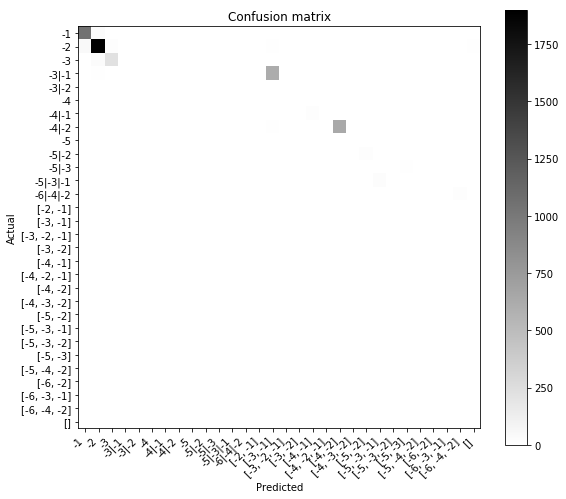

In [17]:
from pandas_ml import ConfusionMatrix

confusion_matrix = ConfusionMatrix(string_gold, string_silver)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot()